# Change-Point Clustering

Exploratory analysis of changepoint clustering on several manual trials.

In [1]:
%matplotlib inline

import exc_analysis.plotting as excplt
import exc_analysis.learning as lrn
import pandas as pd
import numpy as np
# import trajectories as traj
import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('mitch-exp')

In [2]:
ls trial_data

manual_mitch_1101_2319.csv    manual_orlando_1102_1413.csv
manual_mitch_1101_2333.csv    manual_orlando_1102_1418.csv
manual_mitch_1102_1814.csv    manual_shyam_1101_2012.csv
manual_mitch_1102_1819.csv    manual_shyam_1102_1824.csv
manual_orlando_1102_1405.csv


In [3]:
ddir = 'trial_data/'

fnames = ['manual_mitch_1101_2333.csv', 'manual_mitch_1102_1814.csv',
          'manual_mitch_1102_1819.csv']

dfs = []

for i, fn in enumerate(fnames):
    dfs.append(pd.read_csv(ddir + fn))
    dfs[i].set_index('Time', inplace=True)

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
Time,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0


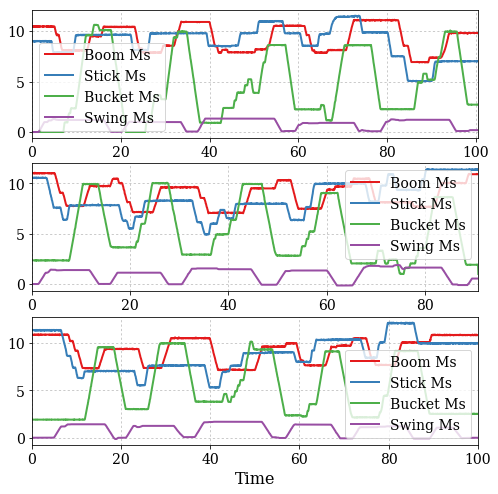

In [4]:
plt.figure(figsize=(8, 8))

for i, df in enumerate(dfs):
    ax = plt.subplot(3, 1, i + 1)
    df[['Boom Ms', 'Stick Ms', 'Bucket Ms', 'Swing Ms']].plot(ax=ax)

In [5]:
# Compute velocity and store in dataframe
for i, df in enumerate(dfs):
    _, rate = lrn.compute_rate(ddir + fnames[i])
    rate = np.insert(rate, 0, np.zeros(4), axis=0)
    df['Boom Vel'] = rate[:, 0]
    df['Stick Vel'] = rate[:, 1]
    df['Bucket Vel'] = rate[:, 2]
    df['Swing Vel'] = rate[:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel
Time,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,0.0,0.0
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,0.0,0.0
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,0.0,0.0
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,0.0,0.0
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,0.0,0.0


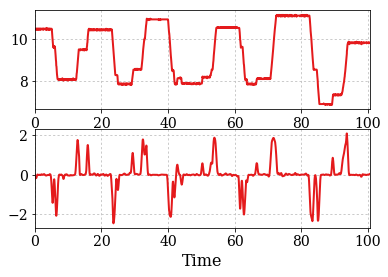

In [6]:
plt.figure()
plt.subplot(211)
dfs[0]['Boom Ms'].plot()

plt.subplot(212)
dfs[0]['Boom Vel'].plot()

In [7]:
lbls = []
thresholds = [0.2, 0.2, 0.2, 0.05]

for i, df in enumerate(dfs):
    lbls.append(np.zeros((len(df), 4)))
    
    for j in range(4):
        lbls[i][:, j] = lrn.get_action_primitives(df[excplt.labels[j] + ' Vel'].values,
                                                 thresholds[j])
    df['Boom Lbl'] = lbls[i][:, 0]
    df['Stick Lbl'] = lbls[i][:, 1]
    df['Bucket Lbl'] = lbls[i][:, 2]
    df['Swing Lbl'] = lbls[i][:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl
Time,,,,,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.0,2.0,2.0
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,0.0,0.0,2.0,2.0,2.0,2.0
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,0.0,0.0,2.0,2.0,2.0,2.0


## Quick sanity check!

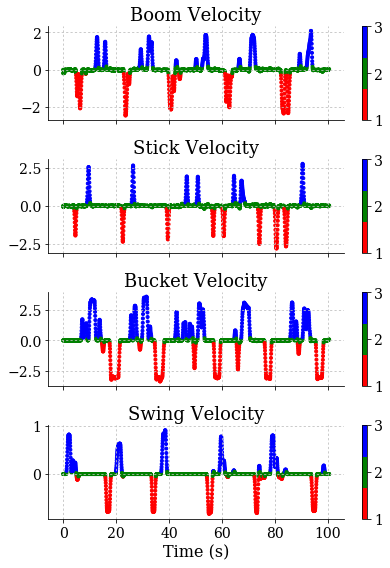

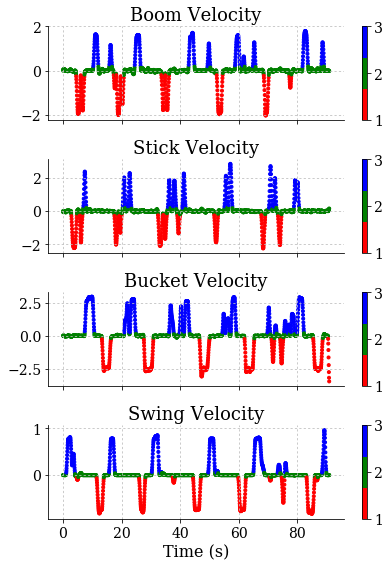

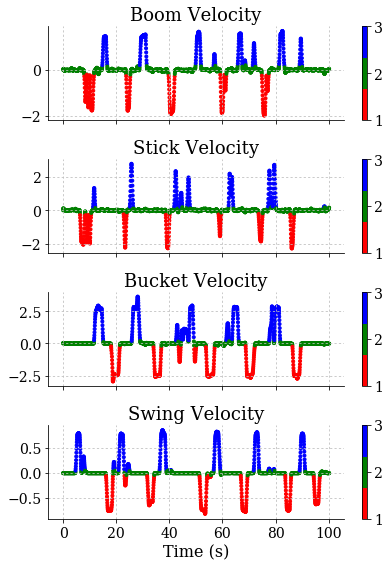

In [8]:
for df, lbl in zip(dfs, lbls):
#     plt.figure()
    lrn.plot_action_primitives(df, lbl)

In [9]:
for df, lbl in zip(dfs, lbls):
    lbl_set = list(set([tuple(lb) for lb in lbl]))
    
    df['Action Class'] = (df[[l + ' Lbl' for l in excplt.labels]]
        .apply(lambda x: lbl_set.index(tuple(x)), axis=1))

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class
Time,,,,,,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.0,2.0,2.0,8
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0,8
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0,8
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,0.0,0.0,2.0,2.0,2.0,2.0,8
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,0.0,0.0,2.0,2.0,2.0,2.0,8


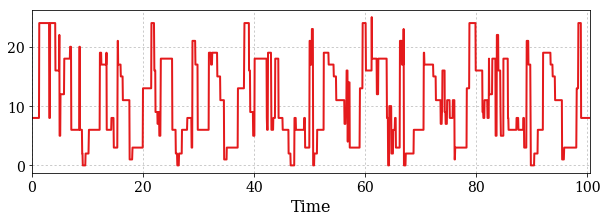

In [10]:
plt.figure(figsize=(10, 3))
dfs[0]['Action Class'].plot()

# End-Effector Space

Use forward kinematics and add X, Y, Z columns to dfs

In [11]:
import exc_analysis.kinematics as kin
from mpl_toolkits.mplot3d import Axes3D

In [12]:
for df in dfs:
    temp = kin.forward_kin_array(df[[l + ' Ms' for l in excplt.labels]]
                                 .values)
    df['X'] = temp[:, 0]
    df['Y'] = temp[:, 1]
    df['Z'] = temp[:, 2]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.0,2.0,2.0,8,61.626645,0.0,31.701287
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0,8,61.626645,0.0,31.701287
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,0.0,0.0,2.0,2.0,2.0,2.0,8,61.835755,0.0,31.445944
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,0.0,0.0,2.0,2.0,2.0,2.0,8,61.626645,0.0,31.701287
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,0.0,0.0,2.0,2.0,2.0,2.0,8,61.723481,0.0,31.311594


# Consolidate

In [13]:
cdfs = []

for df in dfs:
    idx = np.where(np.diff(df['Action Class']))[0] + 1
    cdfs.append(df.iloc[idx])

cdfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,
1.319213,7.474500,6.964500,7.614,7.469500,10.475789,9.038400,0.0,0.000000,0.001866,0.000173,0.0,0.066777,2.0,2.0,2.0,3.0,24,61.514424,0.000000,31.566516
3.131888,7.474500,6.964500,7.614,7.469500,10.475789,9.000800,0.0,0.986656,-0.024964,-0.045908,0.0,0.046381,2.0,2.0,2.0,2.0,8,33.985991,51.408129,31.701287
3.273155,7.474500,6.964500,7.614,7.469500,10.438421,9.000800,0.0,0.986656,-0.033185,-0.039306,0.0,0.057954,2.0,2.0,2.0,3.0,24,34.039394,51.488909,31.311594
4.234559,7.474500,5.694362,7.614,8.169928,10.438421,9.000800,0.0,1.145700,-0.013896,-0.358937,0.0,0.094857,2.0,1.0,2.0,3.0,16,25.455315,56.230019,31.311594
4.935703,6.360344,6.964500,7.614,7.469500,10.438421,7.864063,0.0,1.277254,-0.297095,-0.988660,0.0,0.054586,1.0,1.0,2.0,3.0,22,18.736936,61.986409,35.511891


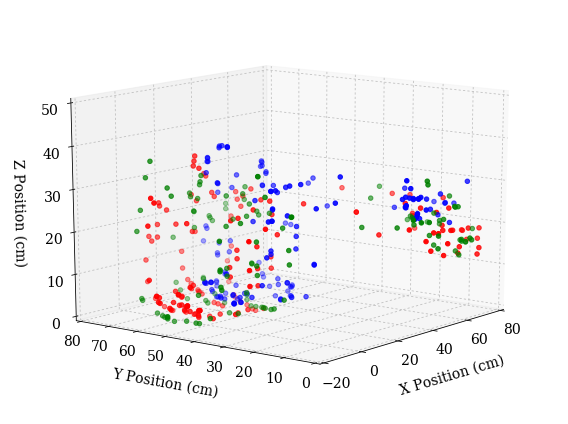

In [14]:
plt.figure(figsize=(8, 6))
excplt.plot_states_3d(cdfs[0], c='b')
excplt.plot_states_3d(cdfs[1], c='r')
excplt.plot_states_3d(cdfs[2], c='g')

plt.tight_layout()

## Quiver Plot

Test plot_quiver_3d

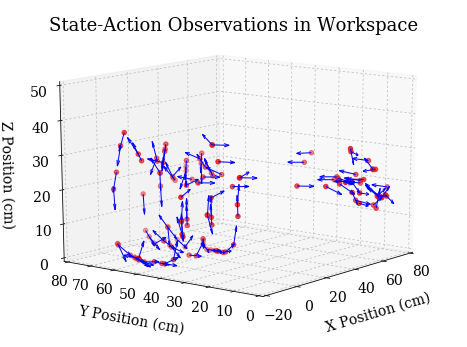

In [15]:
plt.figure(figsize=(8, 6))
excplt.plot_quiver_3d(cdfs[2])

# Acceleration

Diff the velocity columns.

In [16]:
adfs = []

for df in dfs:
    tmp = df[[l + ' Vel' for l in excplt.labels]].diff().fillna(0)
    tmp.columns = [l + ' Accel' for l in excplt.labels]
    adfs.append(df.join(tmp))

adfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Bucket Lbl,Swing Lbl,Action Class,X,Y,Z,Boom Accel,Stick Accel,Bucket Accel,Swing Accel
Time,,,,,,,,,,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,...,2.0,2.0,8,61.626645,0.0,31.701287,0.000000e+00,0.000000e+00,0.0,0.0
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,...,2.0,2.0,8,61.626645,0.0,31.701287,-1.812210e-01,-7.551385e-02,0.0,0.0
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,...,2.0,2.0,8,61.835755,0.0,31.445944,5.551115e-17,-2.775558e-17,0.0,0.0
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,...,2.0,2.0,8,61.626645,0.0,31.701287,2.487169e-03,9.357682e-03,0.0,0.0
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,...,2.0,2.0,8,61.723481,0.0,31.311594,5.190673e-03,1.681952e-02,0.0,0.0


In [17]:
# accel magnitude
for adf in adfs:
    adf['Accel Mag'] = (adf[[l + ' Accel' for l in excplt.labels]]
        .apply(np.linalg.norm, axis=1))

adfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Lbl,Action Class,X,Y,Z,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag
Time,,,,,,,,,,,,,,,,,,,,,
0.002335,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,0.000000,0.000000,...,2.0,8,61.626645,0.0,31.701287,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
0.075772,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.181221,-0.075514,...,2.0,8,61.626645,0.0,31.701287,-1.812210e-01,-7.551385e-02,0.0,0.0,1.963247e-01
0.119442,7.4745,6.9645,7.614,7.4695,10.438421,8.9632,0.0,0.0,-0.181221,-0.075514,...,2.0,8,61.835755,0.0,31.445944,5.551115e-17,-2.775558e-17,0.0,0.0,6.206335e-17
0.208351,7.4745,6.9645,7.614,7.4695,10.475789,9.0008,0.0,0.0,-0.178734,-0.066156,...,2.0,8,61.626645,0.0,31.701287,2.487169e-03,9.357682e-03,0.0,0.0,9.682573e-03
0.295618,7.4745,6.9645,7.614,7.4695,10.438421,9.0008,0.0,0.0,-0.173543,-0.049337,...,2.0,8,61.723481,0.0,31.311594,5.190673e-03,1.681952e-02,0.0,0.0,1.760226e-02


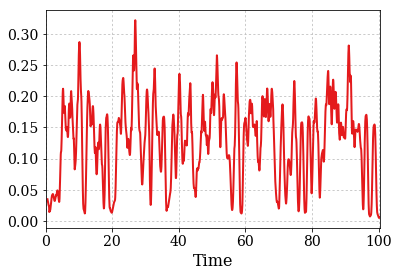

In [18]:
plt.figure()
adfs[0]['Accel Mag'].rolling(window=20, min_periods=10).mean().plot()

In [19]:
adfs[0]['Accel Mag'].quantile(0.75)

0.20981046063628045

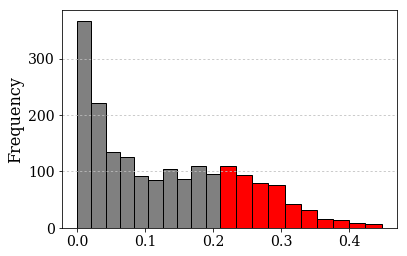

In [20]:
thresh = adfs[0]['Accel Mag'].quantile(0.75)

plt.figure()
(adfs[0]['Accel Mag'][adfs[0]['Accel Mag'] < thresh]
     .plot(kind='hist', color='grey', ec='k'))
(adfs[0]['Accel Mag'][adfs[0]['Accel Mag'] > thresh]
     .plot(kind='hist', color='r', ec='k'))

plt.grid(axis='x')

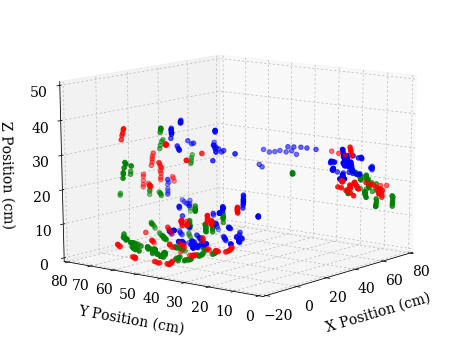

In [21]:
plt.figure(figsize=(8, 6))
cs = ['b', 'g', 'r']

for c, adf in zip(cs, adfs):
    excplt.plot_states_3d(adf[adf['Accel Mag'] > 0.25], c=c)

/usr/local/lib/python2.7/site-packages/matplotlib/mathtext.py:851: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


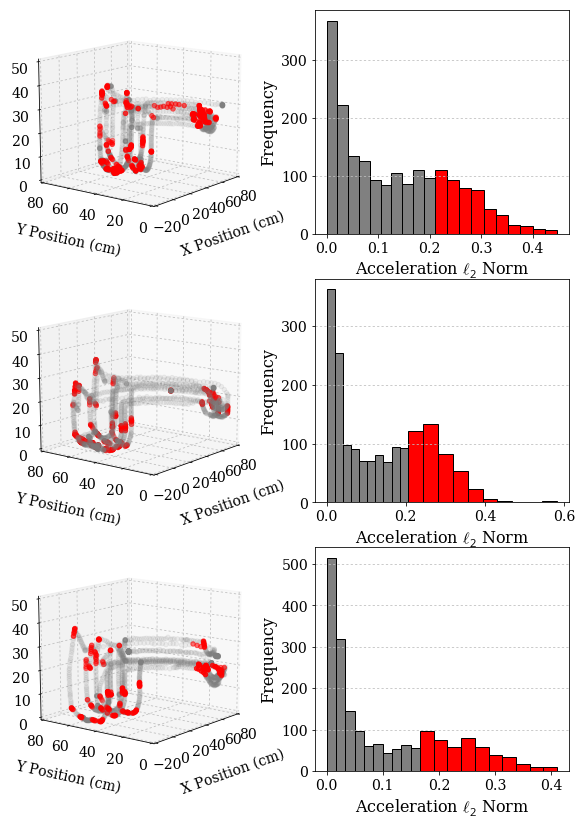

In [22]:
plt.figure(figsize=(10, 14))

for i, adf in enumerate(adfs):
    ax = plt.subplot(3, 2, 2*i + 1, projection='3d')
    excplt.plot_states_3d(adf[adf['Accel Mag'] <= 0.25], c='grey', alpha=0.1)
    excplt.plot_states_3d(adf[adf['Accel Mag'] > 0.25], c='r')

    thresh = adf['Accel Mag'].quantile(0.75)

    ax = plt.subplot(3, 2, (i + 1)*2)
    (adf['Accel Mag'][adf['Accel Mag'] < thresh]
         .plot(kind='hist', color='grey', ec='k'))
    (adf['Accel Mag'][adf['Accel Mag'] > thresh]
         .plot(kind='hist', color='r', ec='k'))
    ax.set_xlabel('Acceleration $\ell_2$ Norm')
    ax.grid(axis='x')


# GMM Clustering

In [23]:
from sklearn import mixture
from itertools import cycle

In [150]:
aadfs = []

for adf in adfs:
    q = adf['Accel Mag'].quantile(0.75)
    aadfs.append(adf[adf['Accel Mag'] > q].copy())
    
assert id(aadfs) != id(adfs)

aadfs[1].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Lbl,Action Class,X,Y,Z,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag
Time,,,,,,,,,,,,,,,,,,,,,
3.036852,7.474500,4.929000,7.614,8.225839,11.020000,10.466296,2.352051,1.117229,-0.005397,-0.868270,...,3.0,20,22.447054,46.048777,26.897933,-0.007523,-0.204124,0.013028,-0.041757,0.208894
3.084724,7.474500,4.929000,7.614,8.225839,11.020000,10.358519,2.352051,1.123119,-0.012373,-1.077365,...,3.0,20,22.376100,46.598123,27.221601,-0.006976,-0.209095,0.013044,-0.023985,0.210986
4.434948,6.725333,5.996507,7.614,6.864599,11.020000,7.566000,2.371026,1.419607,-0.155837,-1.286330,...,2.0,11,9.196594,60.364220,36.888954,-0.075510,0.217623,-0.003130,0.001624,0.230378
4.491593,6.232207,6.307659,7.614,6.914023,11.020000,7.598000,2.333077,1.414698,-0.259896,-1.057520,...,2.0,8,9.487591,60.285285,36.840045,-0.104059,0.228810,-0.003817,-0.000835,0.251391
4.545957,5.872867,6.964500,7.614,7.469500,10.984444,7.598000,2.352051,1.412735,-0.391902,-0.827422,...,2.0,8,9.623532,60.376894,36.402916,-0.132006,0.230098,-0.003201,-0.005275,0.265346


In [160]:
aadfs[1].dropna(inplace=True)

In [148]:
color_iter = cycle(['r', 'g', 'navy', 'gold', 'darkorange',
                    'cornflowerblue', 'grey', 'purple'])

[ 57  32  44  75  54 117  43  52]


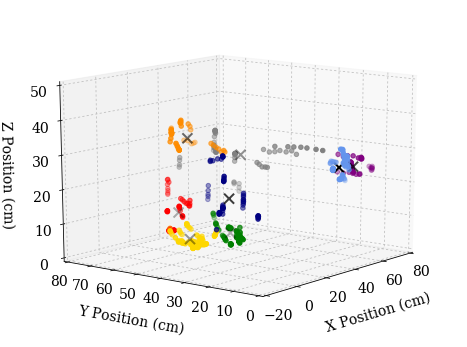

In [192]:
# trial number to examine
tr = 0

gmm0 = mixture.BayesianGaussianMixture(n_components=8, 
    weight_concentration_prior=1,
    weight_concentration_prior_type='dirichlet_process').fit(aadfs[tr][['X', 'Y', 'Z']])

gmm0lbls = gmm0.predict(aadfs[tr][['X', 'Y', 'Z']])
aadfs[tr]['Cluster'] = gmm0lbls

print(np.bincount(aadfs[tr]['Cluster']))

# Plot results
plt.figure(figsize=(8, 6))

ax3d = excplt.plot_gmm_results(aadfs[tr][['X', 'Y', 'Z']].values, 
                               gmm0.predict(aadfs[tr][['X', 'Y', 'Z']]),
                               color_iter)

ax3d.scatter(*np.split(gmm0.means_, 3, axis=1), marker='x', c='k', s=100)

plt.xlabel('X Position (cm)', family='serif', labelpad=15, fontsize=14)
plt.ylabel('Y Position (cm)', family='serif', labelpad=15, fontsize=14)
ax3d.set_zlabel('Z Position (cm)', family='serif', labelpad=10, fontsize=14)

# plt.savefig('figs/cpts/cpt_clusters_%i.pdf' % tr, pad_inches=0.5)

## Acceleration Magnitude Plot

Plot the observations with a colormap representing the magnitude of acceleration.

In [124]:
adfs[tr]['Accel Mag'].describe()

count    1888.000000
mean        0.095277
std         0.099553
min         0.000000
25%         0.014988
50%         0.045955
75%         0.166343
max         0.410693
Name: Accel Mag, dtype: float64

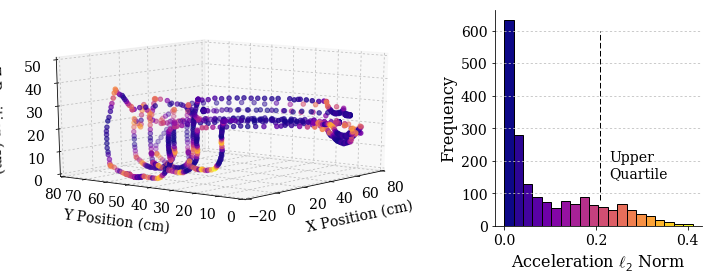

In [144]:
tr = 2

fig = plt.figure(figsize=(10, 4))

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0], projection='3d')
ax1 = excplt.plot_states_3d(adfs[tr].iloc[::2], ax1,
                            c=adfs[tr]['Accel Mag'].iloc[::2], cmap='plasma')
# s = ax1.collections[0]
# s.set_clim([0, 0.5])
# cbar = plt.colorbar(s)

ax2 = plt.subplot(gs[1])

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')

# Plot histogram.
n, bins, patches = ax2.hist(adfs[tr]['Accel Mag'], ec='k', bins=20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

tr=0
    
thresh = adfs[tr]['Accel Mag'].quantile(0.75)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Acceleration $\ell_2$ Norm')

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.grid(axis='x')
ax2.add_line(plt.Line2D([thresh, thresh], [80, 600], color='k', 
                        linestyle='--', linewidth=1))
ax2.text(0.23, 150, 'Upper\nQuartile', fontsize=14)

plt.tight_layout()

plt.savefig('figs/cpts/accel_norm.pdf', pad_inches=0.5)

____

# Changepoint Clustering using Command Rate

Instead of velocity as action, use operator input command, and threshold the rate of change of command to get changepoints.

In [193]:
for df in dfs:
    df['Boom Cmd Rate'] = df['Boom Cmd'].diff().fillna(0)
    df['Stick Cmd Rate'] = df['Stick Cmd'].diff().fillna(0)
    df['Bucket Cmd Rate'] = df['Bucket Cmd'].diff().fillna(0)
    df['Swing Cmd Rate'] = df['Swing Cmd'].diff().fillna(0)

In [195]:
for df in dfs:
    df['Cmd Rate Mag'] = (df[[l + ' Cmd Rate' for l in excplt.labels]]
        .apply(np.linalg.norm, axis=1))

In [196]:
mdfs = []

for df in dfs:
    mdfs.append(df[df['Cmd Rate Mag'] > 0.01])

In [197]:
mdfs[0]['Cmd Rate Mag'].describe()

count    1049.000000
mean        0.388974
std         0.334242
min         0.010027
25%         0.084806
50%         0.316977
75%         0.602363
max         1.593129
Name: Cmd Rate Mag, dtype: float64

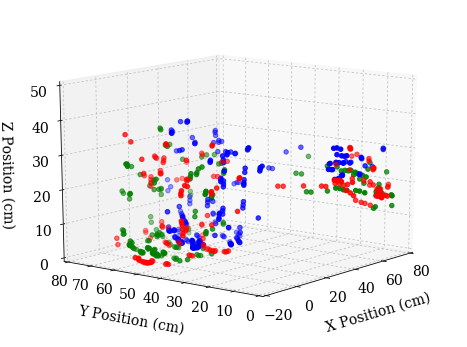

In [198]:
plt.figure(figsize=(8, 6))
cs = ['b', 'g', 'r']
ax = plt.gca(projection='3d')

for c, mdf in zip(cs, mdfs):
    excplt.plot_states_3d(mdf[mdf['Cmd Rate Mag'] > mdf['Cmd Rate Mag'].quantile(0.75)], ax=ax, c=c)

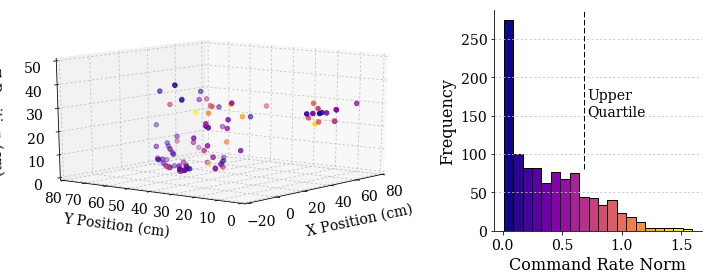

In [202]:
tr = 0
q = 0.8

fig = plt.figure(figsize=(10, 4))
tmdf = mdfs[tr][mdfs[tr]['Cmd Rate Mag'] > mdfs[tr]['Cmd Rate Mag'].quantile(q)]

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0], projection='3d')
ax1 = excplt.plot_states_3d(tmdf.iloc[::2], ax1,
                            c=tmdf['Cmd Rate Mag'].iloc[::2], cmap='plasma')
# s = ax1.collections[0]
# s.set_clim([0, 0.5])
# cbar = plt.colorbar(s)

ax2 = plt.subplot(gs[1])

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')

# Plot histogram.
n, bins, patches = ax2.hist(mdfs[tr]['Cmd Rate Mag'], ec='k', bins=20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
thresh = mdfs[tr]['Cmd Rate Mag'].quantile(q)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Command Rate Norm')

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.grid(axis='x')
ax2.add_line(plt.Line2D([thresh, thresh], [80, 600], color='k', 
                        linestyle='--', linewidth=1))
ax2.text(thresh + 0.03, 150, 'Upper\nQuartile', fontsize=14)

plt.tight_layout()

# plt.savefig('figs/cpts/cmd_rate_norm.pdf', pad_inches=0.5)